In [113]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re, string
import warnings
warnings.filterwarnings('ignore')
# import nltk
# import spacy

## 数据读取和分析

In [114]:
# train_df = pd.read_csv('C:/Users/Lenovo/Desktop/Tweets_disaster/train.csv')
# test_df = pd.read_csv('C:/Users/Lenovo/Desktop/Tweets_disaster/test.csv')

train_df = pd.read_csv(r'E:\Jupyter_notebooks\data\Tweets_disaster\train.csv')
test_df = pd.read_csv(r'E:\Jupyter_notebooks\data\Tweets_disaster\test.csv')





In [115]:
# import Profile_Report
from pandas_profiling import ProfileReport
# generate profile report
train_profile = ProfileReport(train_df, title='Pandas Profiling Report')

In [116]:
train_profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [119]:
train_df.shape

(7613, 5)

In [120]:
train_df.isnull().sum() 

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [121]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [122]:
test_df.shape

(3263, 4)

In [123]:
test_df.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

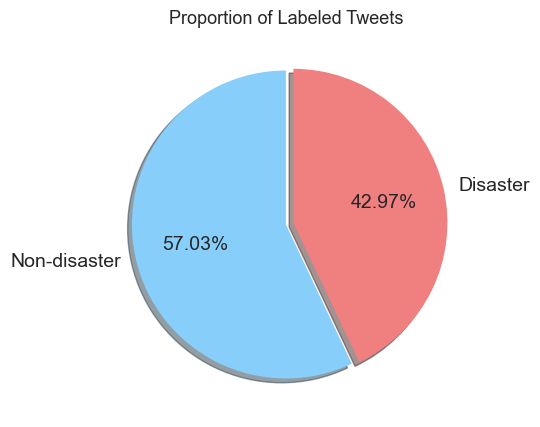

In [124]:
# 设置图大小
plt.figure(figsize=(9, 5))

# 设置图风格
plt.style.use('seaborn-darkgrid')

# 颜色
colors = ['lightskyblue', 'lightcoral']

# 开始画饼状图
plt.pie(train_df['target'].value_counts(), explode=(0, 0.05), labels=["Non-disaster", "Disaster"], 
        autopct="%0.2f%%", textprops={'fontsize': 14}, shadow=True, startangle=90, colors=colors)
# explode表示各个扇形之间的距离，可以突出显示
# shadow=True表示图形有阴影
# startangle从x轴逆时针旋转,饼的旋转角度
# autopct如果它是一个格式字符串，标签将是fmt % pct。如果它是一个函数，它将被调用
# textprops设置字体大小
# pctdistance, default: 0.6每个饼片的中心与由autopct生成的文本的开头之间距离与半径的比率，大于1的话会显示在圆外

plt.title('Proportion of Labeled Tweets', size=13)

plt.show()

## 数据预处理

In [125]:
#把tweets文本转化为字符串
non_disaster_text = [''.join(t) for t in train_df[train_df['target']==0]['text']]
non_disaster_strings = ' '.join(map(str, non_disaster_text))

disaster_text = [''.join(t) for t in train_df[train_df['target']==1]['text']]
disaster_strings = ' '.join(map(str, disaster_text))


In [126]:
# 导入词云
from wordcloud import WordCloud

# 创建词云
non_disaster_cloud = WordCloud(width=800, height=400,max_words=500, background_color='white', random_state=42).generate(non_disaster_strings)
disaster_cloud = WordCloud(width=800, height=400, max_words=500, random_state=42).generate(disaster_strings)


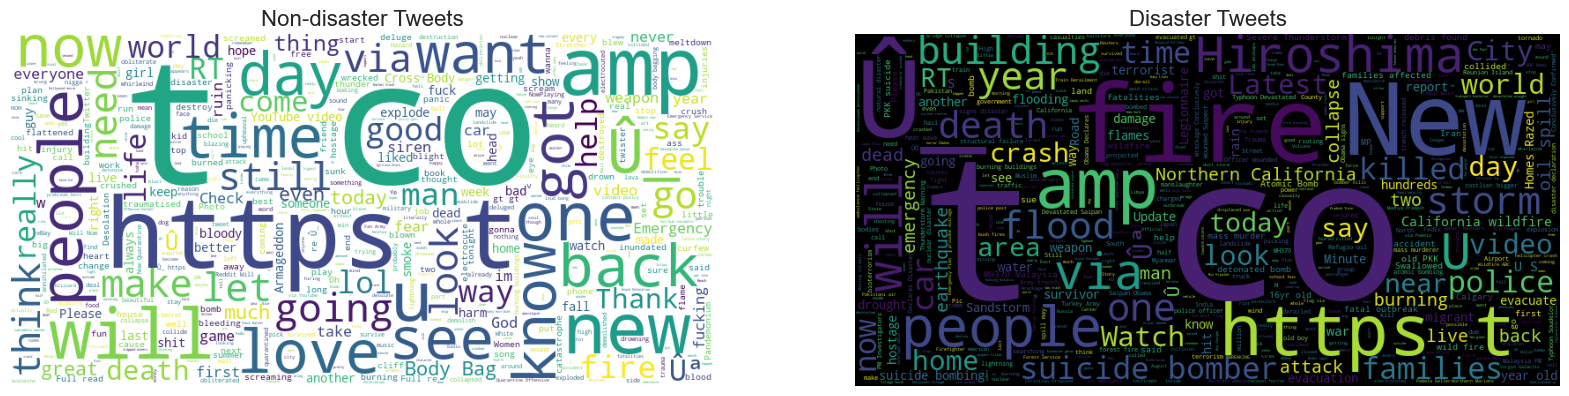

In [127]:
# 创建词云画板
fig, axes = plt.subplots(1, 2, figsize = (20,20))

axes[0].imshow(non_disaster_cloud)
axes[1].imshow(disaster_cloud)

# 去除图中的轴
[ax.axis('off') for ax in axes]

# 添加标题
axes[0].set_title('Non-disaster Tweets', fontsize=16)
axes[1].set_title('Disaster Tweets', fontsize=16)

plt.show()

需要删除文本以下部分：
1、URL
2、HTML标记
3、字符引用
4、不可打印字符
5、数值

###### 删除URL

In [128]:
def remove_url(text):
    text = re.sub(r'((?:https?|ftp|file)://[-\w\d+=&@#/%?~|!:;\.,]*)', '', text)
    return text
# re.sub() 匹配替换为选择的文本


train_df['text_cleaned'] = train_df['text'].apply(remove_url)
test_df['text_cleaned'] = test_df['text'].apply(remove_url)

###### 删除HTML标记

In [129]:
def remove_HTML(text):
    text = re.sub(r'<.*?>', '', text)
    return text
# *？表示贪婪模式

train_df['text_cleaned'] = train_df['text_cleaned'].apply(remove_HTML)
test_df['text_cleaned'] = test_df['text_cleaned'].apply(remove_HTML)

###### 删除字符引用

In [130]:
# 例如e.g., &lt;, &amp;, &nbsp;
def remove_references(text):
    text = re.sub(r'&[a-zA-Z]+;?', '', text)
    return text

train_df['text_cleaned'] = train_df['text_cleaned'].apply(remove_references)
test_df['text_cleaned'] = test_df['text_cleaned'].apply(remove_references)

##### 删除不可打印字符

In [131]:
# 查看不可打印字符
string.printable

'0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ \t\n\r\x0b\x0c'

In [132]:
def remove_non_printable(text):
    text = ''.join([word for word in text if word in string.printable])
    return text

train_df['text_cleaned'] = train_df['text_cleaned'].apply(remove_non_printable)
test_df['text_cleaned'] = test_df['text_cleaned'].apply(remove_non_printable)

###### 删除数值

In [133]:
def remove_num(text):
    text = re.sub(r'\w*\d+\w*', '', text)
    return text

train_df['text_cleaned'] = train_df['text_cleaned'].apply(remove_num)
test_df['text_cleaned'] = test_df['text_cleaned'].apply(remove_num)

In [134]:
# 查看结果
train_df.head(5)

,id,keyword,location,text,target,text_cleaned
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this #earthquake M...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask. Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to 'shelter in place' are ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,", people receive #wildfires evacuation orders ..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby #Alaska as ...


In [135]:
test_df.head(5)

,id,keyword,location,text,text_cleaned
0,0,NaN,NaN,Just happened a terrible car crash,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...","Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...","there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,Typhoon Soudelor kills in China and Taiwan


# 特征工程

In [136]:
train=train_df[["text_cleaned","target"]]

In [137]:
test=test_df[["text_cleaned"]]

In [138]:
#先划分训练集和测试集
X = train['text_cleaned']
y = train['target']

In [88]:
#通过“词频-逆文本频率”（TF-IDF）处理，给文本中的单词添加权重
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()   

X1 = vectorizer.fit_transform(X)

In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [140]:
#通过“词频-逆文本频率”（TF-IDF）处理，给文本中的单词添加权重
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()   

X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)
X_test_vect_all = vectorizer.transform(test['text_cleaned'])

<6090x13919 sparse matrix of type '<class 'numpy.float64'>'
	with 76583 stored elements in Compressed Sparse Row format>

# 建模

In [141]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import cross_validate, cross_val_score, StratifiedKFold
def RandomizedSearch(X_train, y_train, model, parameters):
    
    search = RandomizedSearchCV(estimator=model,
                                param_distributions=parameters,
                                cv=StratifiedKFold(n_splits=10),
                                verbose=1,
                                n_iter=10,
                                random_state=10)
    search.fit(X_train, y_train)
    print('****************************************')
    print('Best Parameters')
    print(search.best_params_)
    print('****************************************')
    return (search.best_estimator_)

In [142]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

parameters = {
    'C': [0.1,1,10,100],
    'kernel': ['linear','rbf'],
    'gamma':[0.001,0.01,0.1,1]
}

clf = SVC(probability=True)
clf.fit(X_train_vect, y_train)

y_pred = clf.predict(X_test_vect)

In [143]:
from sklearn.metrics import accuracy_score

score=accuracy_score(y_test, y_pred)
score


0.8076165462902167

In [144]:
y_pred_all = clf.predict(X_test_vect_all)
y_pred_all

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [145]:
pd.DataFrame(y_pred_all)

,0
0,1
1,0
2,1
3,0
4,1
...,...
3258,1
3259,1
3260,1
3261,1


In [146]:
clf.predict_proba(X_test_vect)

array([[0.09520858, 0.90479142],
       [0.74844593, 0.25155407],
       [0.5       , 0.5       ],
       ...,
       [0.06139094, 0.93860906],
       [0.03007721, 0.96992279],
       [0.02554873, 0.97445127]])

0.000000 0.000000 1.999990
0.000000 0.001558 0.999990
0.000000 0.024922 0.988427
0.000000 0.034268 0.987224
0.000000 0.035826 0.986786
0.000000 0.038941 0.985956
0.001135 0.038941 0.984932
0.001135 0.042056 0.983596
0.001135 0.045171 0.983097
0.001135 0.054517 0.980482
0.001135 0.060748 0.979544
0.001135 0.066978 0.979224
0.001135 0.070093 0.978735
0.001135 0.074766 0.978338
0.001135 0.091900 0.975644
0.001135 0.099688 0.975428
0.001135 0.138629 0.967549
0.001135 0.141745 0.967229
0.001135 0.143302 0.967193
0.002270 0.143302 0.967142
0.002270 0.177570 0.961703
0.002270 0.183801 0.961700
0.002270 0.188474 0.961699
0.004540 0.188474 0.961694
0.004540 0.190031 0.961691
0.005675 0.190031 0.961689
0.005675 0.193146 0.961689
0.005675 0.197819 0.961685
0.005675 0.200935 0.961684
0.005675 0.214953 0.961673
0.005675 0.219626 0.961672
0.005675 0.224299 0.961670
0.005675 0.227414 0.961670
0.005675 0.230530 0.961663
0.005675 0.233645 0.961662
0.005675 0.241433 0.961657
0.005675 0.255452 0.961638
0

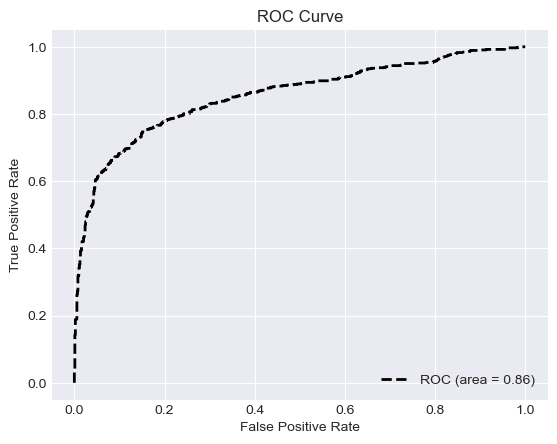

In [147]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
 
# y_label = ([1, 1, 1, 2, 2, 2])  # 非二进制需要pos_label
# y_pre = ([0.3, 0.5, 0.9, 0.8, 0.4, 0.6])
fpr, tpr, thersholds = roc_curve(y_test, clf.predict_proba(X_test_vect)[:,1],pos_label=1)
 
for i, value in enumerate(thersholds):
    print("%f %f %f" % (fpr[i], tpr[i], value))
 
roc_auc = auc(fpr, tpr)
 
plt.plot(fpr, tpr, 'k--', label='ROC (area = {0:.2f})'.format(roc_auc), lw=2)
 
plt.xlim([-0.05, 1.05])  # 设置x、y轴的上下限，以免和边缘重合，更好的观察图像的整体
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')  # 可以使用中文，但需要导入一些库即字体
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [151]:
sample_submission=pd.read_csv(r"E:\Jupyter_notebooks\data\Tweets_disaster\sample_submission.csv")

In [152]:
sample_submission["target"]=y_pred_all

In [153]:
sample_submission

,id,target
0,0,1
1,2,0
2,3,1
3,9,0
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1


In [154]:
sample_submission.to_csv(r"E:\Jupyter_notebooks\data\Tweets_disaster\sample_submission.csv",index=None)

# 逻辑回归

In [99]:
from sklearn.linear_model import LogisticRegression as LR
parameters = {
    'penalty': ['l1','l2','elasticnet','none'],
    'C': np.logspace(-4,4,20),
    'solver': ['lbfgs','newton-cg','sag','saga'],
    'max_iter':[100,1000,2500,5000,10000]
}
model=RandomizedSearch(X_train_vect,y_train,LR(random_state=0),parameters)
# y_pred=model.predict(X_test_vect)



Fitting 10 folds for each of 10 candidates, totalling 100 fits
****************************************
Best Parameters
{'solver': 'lbfgs', 'penalty': 'none', 'max_iter': 5000, 'C': 78.47599703514607}
****************************************


In [101]:
y_pred=model.predict(X_test_vect)
accuracy_score(y_pred,y_test)


0.7537754432042022

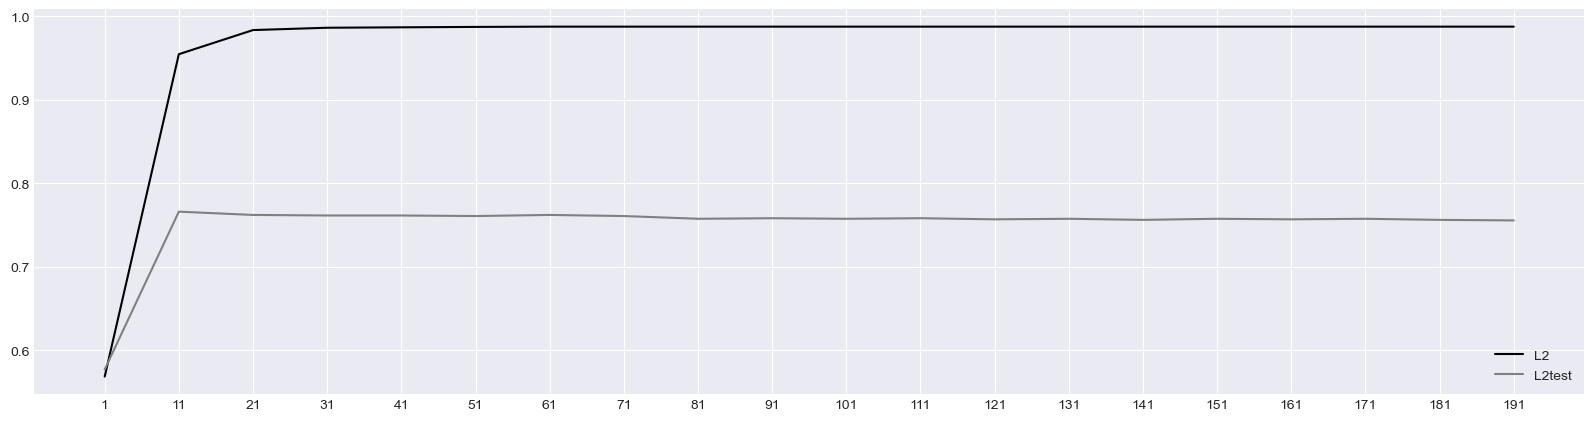

In [100]:
l2=[]
l2test=[]
for i in np.arange(1,201,10):
    lrl2=LR(penalty="none",solver="lbfgs",C=78.47599703514607,max_iter=i)
    lrl2=lrl2.fit(X_train_vect,y_train)
    l2.append(accuracy_score(lrl2.predict(X_train_vect),y_train))
    l2test.append(accuracy_score(lrl2.predict(X_test_vect),y_test))

graph = [l2,l2test]
color = ["black","gray"]
label = ["L2","L2test"]

plt.figure(figsize=(20,5))
for i in range(len(graph)):
    plt.plot(np.arange(1,201,10),graph[i],color[i],label=label[i])
plt.legend(loc=4)
plt.xticks(np.arange(1,201,10))
plt.show()

0.000000 0.000000 2.000000
0.151308 0.677019 1.000000
0.154721 0.677019 1.000000
0.155859 0.678571 1.000000
0.158134 0.678571 1.000000
0.158134 0.680124 1.000000
0.166098 0.680124 1.000000
0.166098 0.683230 1.000000
0.167235 0.683230 1.000000
0.167235 0.684783 1.000000
0.175199 0.684783 1.000000
0.175199 0.687888 1.000000
0.177474 0.687888 1.000000
0.177474 0.689441 1.000000
0.179750 0.689441 1.000000
0.179750 0.690994 1.000000
0.186576 0.690994 0.999999
0.186576 0.692547 0.999999
0.193402 0.692547 0.999997
0.193402 0.694099 0.999997
0.196815 0.694099 0.999914
0.196815 0.695652 0.999873
0.197952 0.695652 0.999865
0.197952 0.697205 0.999861
0.202503 0.697205 0.992897
0.202503 0.700311 0.983046
0.204778 0.700311 0.973901
0.204778 0.701863 0.963005
0.205916 0.701863 0.916564
0.205916 0.704969 0.911107
0.208191 0.704969 0.829718
0.208191 0.708075 0.666744
0.209329 0.708075 0.666669
0.209329 0.709627 0.603577
0.212742 0.709627 0.600010
0.213879 0.709627 0.529597
0.213879 0.711180 0.500007
0

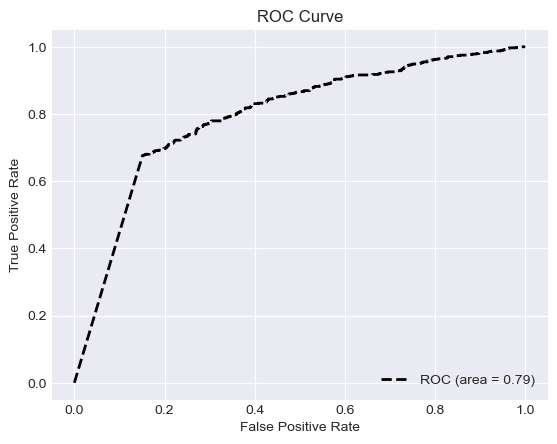

In [103]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
 
# y_label = ([1, 1, 1, 2, 2, 2])  # 非二进制需要pos_label
# y_pre = ([0.3, 0.5, 0.9, 0.8, 0.4, 0.6])
fpr, tpr, thersholds = roc_curve(y_test, model.predict_proba(X_test_vect)[:,1],pos_label=1)
 
for i, value in enumerate(thersholds):
    print("%f %f %f" % (fpr[i], tpr[i], value))
 
roc_auc = auc(fpr, tpr)
 
plt.plot(fpr, tpr, 'k--', label='ROC (area = {0:.2f})'.format(roc_auc), lw=2)
 
plt.xlim([-0.05, 1.05])  # 设置x、y轴的上下限，以免和边缘重合，更好的观察图像的整体
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')  # 可以使用中文，但需要导入一些库即字体
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [112]:
y_pred_all = clf.predict(X_test_vect_all)
y_pred_all=pd.DataFrame(y_pred_all)
y_pred_all

,0
0,0
1,0
2,1
3,0
4,1
...,...
3258,1
3259,1
3260,1
3261,1


In [110]:
sample_submission=pd.read_csv(r"E:\Jupyter_notebooks\data\Tweets_disaster\sample_submission.csv")
sample_submission["target"]=y_pred_all

In [111]:
sample_submission

,id,target
0,0,0
1,2,0
2,3,1
3,9,0
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1
